# Credit Card fraud - With Synthetic Minority Oversampling Technique

**Context**<br>
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**<br>
The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.<br>

**Inspiration**<br>
Identify fraudulent credit card transactions.
<br><br>
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 
Confusion matrix accuracy is not meaningful for unbalanced classification.

## Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf

## Load the dataset and Validate Data Load

In [2]:
# Load the dataset 

creditcard = pd.read_csv("../../../LargeDatasets/creditcard.csv")

creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Lets Check the data structure
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for any missing values
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis

0    284315
1       492
Name: Class, dtype: int64
Fraud Transactions are - 0.1727485630620034 % of Total


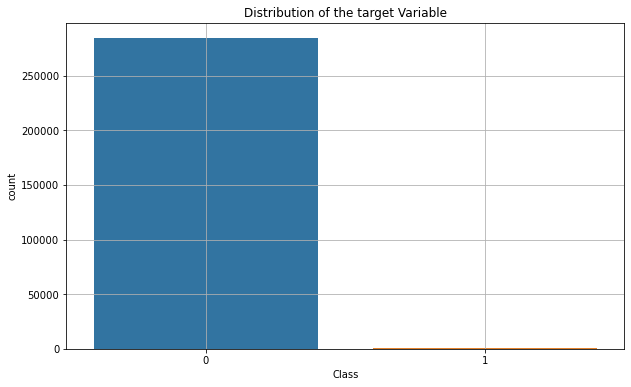

In [5]:
# Explore the response variable

plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=creditcard)
plt.grid()
plt.title("Distribution of the target Variable")

# Value Counts
print(creditcard['Class'].value_counts())
print(f"Fraud Transactions are - {len(creditcard[creditcard['Class'] == 1])/len(creditcard) * 100} % of Total")

<AxesSubplot:xlabel='V1', ylabel='V2'>

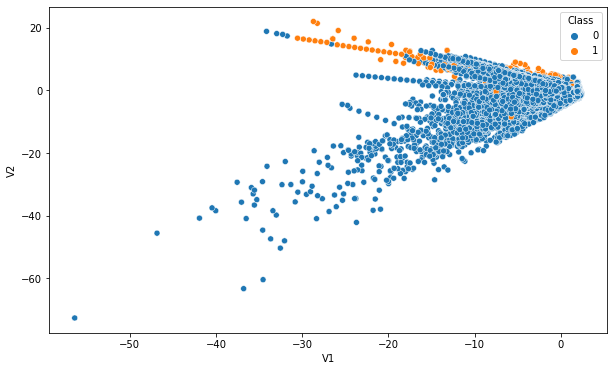

In [6]:
# We would see the interaction between V1 and V2

plt.figure(figsize=(10, 6))
sns.scatterplot(x="V1", y="V2", hue="Class", data=creditcard)

<Figure size 720x432 with 0 Axes>

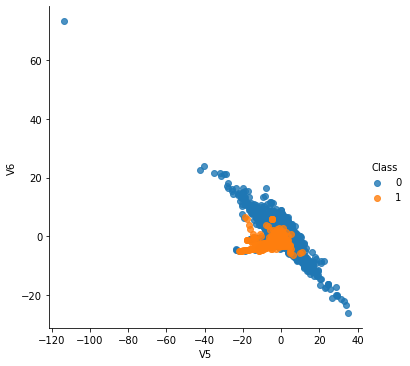

In [7]:
# We would observe the interaction between V5 and V6 through lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(x="V5", y="V6", hue="Class", data=creditcard, fit_reg=False)

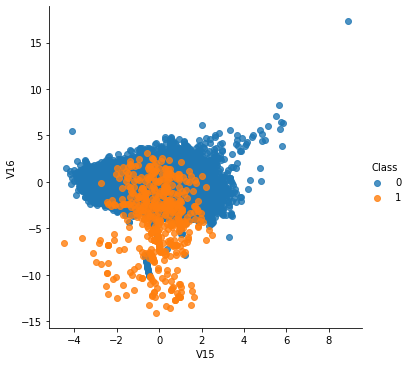

In [8]:
# Taking two more attributes
sns.lmplot(x="V15", y="V16", hue='Class', data=creditcard, fit_reg=False)

#### Each of the above plot shows that fraudulent transactions are more or less concentrated at one place

In [9]:
# We will introduce a log of the Amount column, use the column in modelling and drop the original Amount column
# However in order to do this, there are some values with 0 in Amount and Log(0) is infinity and hence we add a very small
# negligible amount to the log to avoid this infinity error

adjustments = 0.001

creditcard['Log Amount'] = np.log(creditcard['Amount'] + adjustments)

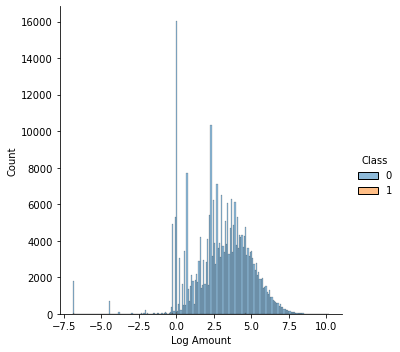

In [10]:
sns.displot(x="Log Amount", hue='Class', data=creditcard)

## Train Test Split and Feature Scaling

In [11]:
# Dropping Columns like Time, Amount

creditcard = creditcard.drop(labels=["Time", "Amount"], axis=1)

In [12]:
# Extracting features and target

features = creditcard.drop(labels=['Class'], axis = 1)
target = creditcard['Class']

In [13]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = sc.fit_transform(features)
features

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  1.02091976],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.96466543],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.47975471],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 ,  0.63036959],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31596056],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  1.20464259]])

In [14]:
# Perform the training, validation and test splits

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, 
                                                                            random_state=101, stratify=target)

features_train, features_validation, target_train, target_validation = train_test_split(features_train, target_train,
                                                                                        test_size=0.3, random_state=101, 
                                                                                        stratify=target_train)

In [15]:
print("Training Features shape: ", features_train.shape)
print("Training Target shape: ", target_train.shape)

print("Validation Features shape: ", features_validation.shape)
print("Validation Target shape: ", target_validation.shape)

print("Test Features shape: ", features_test.shape)
print("Training Target shape: ", target_test.shape)

Training Features shape:  (139554, 29)
Training Target shape:  (139554,)
Validation Features shape:  (59810, 29)
Validation Target shape:  (59810,)
Test Features shape:  (85443, 29)
Training Target shape:  (85443,)


## Build and Train the Neural Network Model

In [16]:
# Define the Model Constants

INPUT_SHAPE = (features_train.shape[1], )

OUTPUT_UNITS = 1
HIDDEN_UNITS = 16
ACTIVATION_HIDDEN = tf.keras.activations.relu
ACTIVATION_OUTPUT = tf.keras.activations.sigmoid
LEARNING_RATE = 1e-3
OPTIMIZER = tf.keras.optimizers.Adam(LEARNING_RATE)
LOSS_FUNCTION = tf.keras.losses.BinaryCrossentropy()
DROPOUT_RATE = 0.5

EPOCHS = 100
BATCH_SIZE = 2048

**Model is fit using a larger than default batch size.. We train with a size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no fraudulent transactions to learn from.**

In [17]:
# Define the Metrics

METRICS = [tf.keras.metrics.TruePositives(name='tp'),
          tf.keras.metrics.FalsePositives(name='fp'),
          tf.keras.metrics.TrueNegatives(name='tn'),
          tf.keras.metrics.FalseNegatives(name='fn'), 
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall'),
          tf.keras.metrics.AUC(name='auc')]

#### Function to build and compile the model

#### Understanding Useful Metrics

Note that there are a few metrics defined below that can be computed by the model that will be helpful when evaluating the performance.

<img src="resources/classification-metrics.png" length=800 width=800>

In [18]:
# Function which will build and compile the model

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = tf.keras.models.Sequential([
           tf.keras.layers.Dense(input_shape=INPUT_SHAPE, units=HIDDEN_UNITS, activation=ACTIVATION_HIDDEN),
           tf.keras.layers.Dropout(DROPOUT_RATE),
           tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=ACTIVATION_OUTPUT, bias_initializer=output_bias)
       ])
    model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=metrics)
    return model

In [19]:
# Lets build the model and see the mmodel summary

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [20]:
# we will now train the model on training and validation data

epochs_history = model.fit(features_train, target_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                          validation_data=(features_validation, target_validation),
                          verbose=1)

Epoch 1/100
69/69 [==============================] - 1s 16ms/step - loss: 0.6259 - tp: 49.0000 - fp: 49193.0000 - tn: 90120.0000 - fn: 192.0000 - accuracy: 0.6461 - precision: 9.9509e-04 - recall: 0.2033 - auc: 0.2362 - val_loss: 0.3807 - val_tp: 1.0000 - val_fp: 1900.0000 - val_tn: 57807.0000 - val_fn: 102.0000 - val_accuracy: 0.9665 - val_precision: 5.2604e-04 - val_recall: 0.0097 - val_auc: 0.0672
Epoch 2/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3598 - tp: 40.0000 - fp: 18777.0000 - tn: 120536.0000 - fn: 201.0000 - accuracy: 0.8640 - precision: 0.0021 - recall: 0.1660 - auc: 0.3466 - val_loss: 0.2031 - val_tp: 0.0000e+00 - val_fp: 37.0000 - val_tn: 59670.0000 - val_fn: 103.0000 - val_accuracy: 0.9977 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.1345
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 0.2353 - tp: 46.0000 - fp: 7247.0000 - tn: 132066.0000 - fn: 195.0000 - accuracy: 0.9467 - precision: 0.0063 - recall

Epoch 22/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0206 - tp: 163.0000 - fp: 22.0000 - tn: 139291.0000 - fn: 78.0000 - accuracy: 0.9993 - precision: 0.8811 - recall: 0.6763 - auc: 0.8985 - val_loss: 0.0038 - val_tp: 77.0000 - val_fp: 12.0000 - val_tn: 59695.0000 - val_fn: 26.0000 - val_accuracy: 0.9994 - val_precision: 0.8652 - val_recall: 0.7476 - val_auc: 0.9315
Epoch 23/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0194 - tp: 163.0000 - fp: 25.0000 - tn: 139288.0000 - fn: 78.0000 - accuracy: 0.9993 - precision: 0.8670 - recall: 0.6763 - auc: 0.9111 - val_loss: 0.0038 - val_tp: 78.0000 - val_fp: 12.0000 - val_tn: 59695.0000 - val_fn: 25.0000 - val_accuracy: 0.9994 - val_precision: 0.8667 - val_recall: 0.7573 - val_auc: 0.9316
Epoch 24/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0185 - tp: 161.0000 - fp: 23.0000 - tn: 139290.0000 - fn: 80.0000 - accuracy: 0.9993 - precision: 0.8750 - recall: 0.6680 - auc: 0.9032 - va

Epoch 43/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0101 - tp: 170.0000 - fp: 22.0000 - tn: 139291.0000 - fn: 71.0000 - accuracy: 0.9993 - precision: 0.8854 - recall: 0.7054 - auc: 0.9240 - val_loss: 0.0037 - val_tp: 82.0000 - val_fp: 13.0000 - val_tn: 59694.0000 - val_fn: 21.0000 - val_accuracy: 0.9994 - val_precision: 0.8632 - val_recall: 0.7961 - val_auc: 0.9317
Epoch 44/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0095 - tp: 161.0000 - fp: 22.0000 - tn: 139291.0000 - fn: 80.0000 - accuracy: 0.9993 - precision: 0.8798 - recall: 0.6680 - auc: 0.9235 - val_loss: 0.0037 - val_tp: 82.0000 - val_fp: 13.0000 - val_tn: 59694.0000 - val_fn: 21.0000 - val_accuracy: 0.9994 - val_precision: 0.8632 - val_recall: 0.7961 - val_auc: 0.9317
Epoch 45/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0097 - tp: 167.0000 - fp: 24.0000 - tn: 139289.0000 - fn: 74.0000 - accuracy: 0.9993 - precision: 0.8743 - recall: 0.6929 - auc: 0.9193 - va

Epoch 64/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0068 - tp: 161.0000 - fp: 27.0000 - tn: 139286.0000 - fn: 80.0000 - accuracy: 0.9992 - precision: 0.8564 - recall: 0.6680 - auc: 0.9350 - val_loss: 0.0038 - val_tp: 83.0000 - val_fp: 14.0000 - val_tn: 59693.0000 - val_fn: 20.0000 - val_accuracy: 0.9994 - val_precision: 0.8557 - val_recall: 0.8058 - val_auc: 0.9317
Epoch 65/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0071 - tp: 167.0000 - fp: 28.0000 - tn: 139285.0000 - fn: 74.0000 - accuracy: 0.9993 - precision: 0.8564 - recall: 0.6929 - auc: 0.9289 - val_loss: 0.0039 - val_tp: 83.0000 - val_fp: 14.0000 - val_tn: 59693.0000 - val_fn: 20.0000 - val_accuracy: 0.9994 - val_precision: 0.8557 - val_recall: 0.8058 - val_auc: 0.9317
Epoch 66/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0071 - tp: 166.0000 - fp: 22.0000 - tn: 139291.0000 - fn: 75.0000 - accuracy: 0.9993 - precision: 0.8830 - recall: 0.6888 - auc: 0.9309 - va

Epoch 85/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0058 - tp: 157.0000 - fp: 21.0000 - tn: 139292.0000 - fn: 84.0000 - accuracy: 0.9992 - precision: 0.8820 - recall: 0.6515 - auc: 0.9430 - val_loss: 0.0039 - val_tp: 83.0000 - val_fp: 14.0000 - val_tn: 59693.0000 - val_fn: 20.0000 - val_accuracy: 0.9994 - val_precision: 0.8557 - val_recall: 0.8058 - val_auc: 0.9365
Epoch 86/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0055 - tp: 160.0000 - fp: 17.0000 - tn: 139296.0000 - fn: 81.0000 - accuracy: 0.9993 - precision: 0.9040 - recall: 0.6639 - auc: 0.9451 - val_loss: 0.0039 - val_tp: 84.0000 - val_fp: 14.0000 - val_tn: 59693.0000 - val_fn: 19.0000 - val_accuracy: 0.9994 - val_precision: 0.8571 - val_recall: 0.8155 - val_auc: 0.9365
Epoch 87/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0055 - tp: 160.0000 - fp: 25.0000 - tn: 139288.0000 - fn: 81.0000 - accuracy: 0.9992 - precision: 0.8649 - recall: 0.6639 - auc: 0.9454 - va

#### Check some of the performance graphs

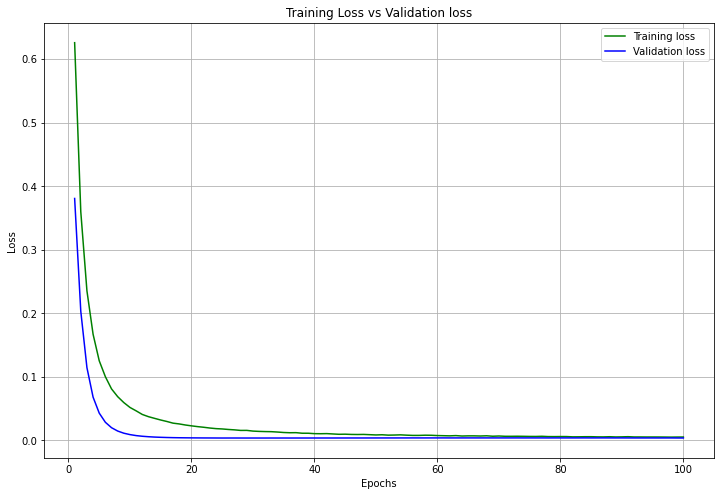

In [21]:
plt.figure(figsize=(12, 8))

loss_train = epochs_history.history['loss']
loss_val = epochs_history.history['val_loss']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training Loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

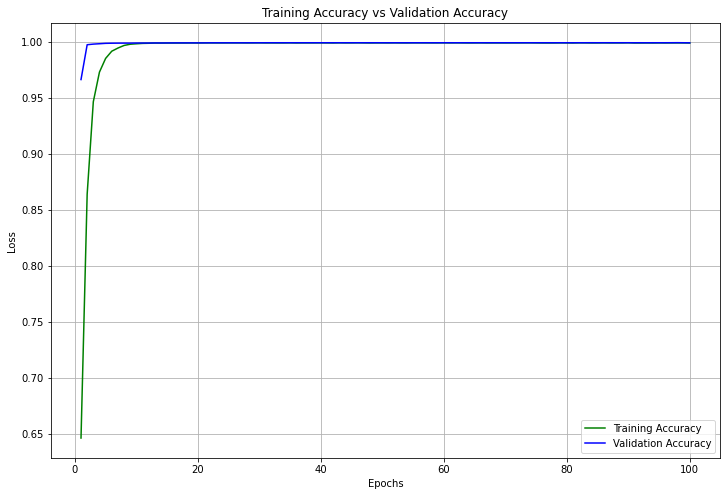

In [22]:
plt.figure(figsize=(12, 8))

loss_train = epochs_history.history['accuracy']
loss_val = epochs_history.history['val_accuracy']

epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Model Validation

In [23]:
# Let us run the predictions

target_predictions = model.predict(features_test)

In [24]:
# Let us visualize the Confusion Matrix and detail out some key metrices including classification report

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, balanced_accuracy_score

def plot_cm(labels, predictions, threshold=0.5):
    cm = confusion_matrix(labels, predictions > threshold)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix %0.2f" %threshold)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print("\n")
    print("F1-Score")
    print(f1_score(target_test, target_predictions > 0.5))
    print("\n")
    print("Accuracy Score")
    print(accuracy_score(target_test, target_predictions > threshold))
    print("\n")
    print("Balanced Accuracy Score")
    print(balanced_accuracy_score(target_test, target_predictions > threshold))
    print("\n")
    print("Classification Report")
    print(classification_report(target_test, target_predictions > 0.5))

Legitimate Transactions Detected (True Negatives):  85281
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  39
Fraudulent Transactions Detected (True Positives):  109
Total Fraudulent Transactions:  148


F1-Score
0.8044280442804429


Accuracy Score
0.9993797034280163


Balanced Accuracy Score
0.8681611751267065


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.74      0.80       148

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



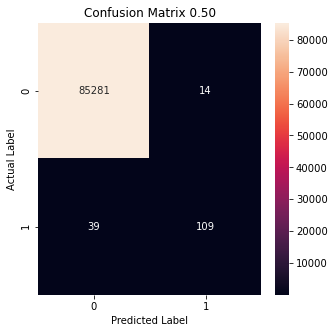

In [25]:
# Now use the function to plot the confusion matrix

plot_cm (target_test, target_predictions)